In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from sys import path, platform

## Set project root
if platform == "linux" or platform == "linux2":
    pass
    # root_dir = '/mnt/g/My Drive/Schiller-Gu-Lab/Projects/SlotMachine/slots-reversal-project/'
    # model_functions_path = f'{root_dir}/derivatives/computational_modeling/'
elif platform == "darwin":
    root_dir = '/Users/kulkarnik/LocalProjects/SlotsTasks/online/prolific-food-craving/'
    model_functions_path = f'{root_dir}/derivatives/decision/'
elif platform == "win32":
    pass
    # root_dir = 'G:\\My Drive\\Schiller-Gu-Lab\\Projects\\SlotMachine\\slots-reversal-project/'
    # model_functions_path = f'{root_dir}/derivatives/computational_modeling/code/'

## Add model_functions to system path
path.append(model_functions_path)

from utils import load_data, plotting
from bayesian_model_functions import RescorlaWagner, Biased, Heuristic, RWRL, RWDecay


In [2]:
# Graphing libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

## Load data

In [3]:
path_to_summary = f'{root_dir}/rawdata/clean_df_summary.csv'
path_to_longform = f'{root_dir}/rawdata/clean_df_longform.csv'
df_summary, longform = load_data.load_clean_dbs(path_to_summary, path_to_longform)
# df_summary

In [4]:
df_summary = df_summary[
    (df_summary['Money Accuracy']>0.4) & 
    (df_summary['Other Accuracy']>0.4)]
df_summary.shape

(43, 10)

In [5]:
longform = longform[(longform['pid_db'].isin(df_summary['id'])) & (longform['Type']!='practice')]
longform

,PID,id,Block,Type,Trial,Cue Time,Action,Action Time,Reward,Reward Time,RT,Spin Speed,Craving Rating,Mood Rating,pid_db
5,61281debe85082cc937dd9ae,6,1,other,1,1.647963e+09,1,1.647963e+09,1,1.647963e+09,0.972,fast,-1.0,-1.0,1
6,61281debe85082cc937dd9ae,7,1,other,2,1.647963e+09,1,1.647963e+09,0,1.647963e+09,0.045,fast,35.0,-1.0,1
7,61281debe85082cc937dd9ae,8,1,other,3,1.647963e+09,0,1.647963e+09,1,1.647963e+09,0.718,slow,-1.0,-1.0,1
8,61281debe85082cc937dd9ae,9,1,other,4,1.647963e+09,0,1.647963e+09,0,1.647963e+09,0.030,slow,-1.0,-1.0,1
9,61281debe85082cc937dd9ae,10,1,other,5,1.647963e+09,0,1.647963e+09,0,1.647963e+09,0.500,fast,34.0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,6102d5e6ff92a8dd0cce6b8f,5700,2,other,56,1.648471e+09,1,1.648471e+09,1,1.648471e+09,0.754,slow,-1.0,-1.0,47
5621,6102d5e6ff92a8dd0cce6b8f,5701,2,other,57,1.648471e+09,1,1.648471e+09,1,1.648471e+09,0.637,slow,-1.0,-1.0,47
5622,6102d5e6ff92a8dd0cce6b8f,5702,2,other,58,1.648471e+09,1,1.648471e+09,1,1.648471e+09,0.505,fast,-1.0,-1.0,47
5623,6102d5e6ff92a8dd0cce6b8f,5703,2,other,59,1.648471e+09,1,1.648471e+09,1,1.648471e+09,0.652,fast,-1.0,-1.0,47


## General parameters

In [6]:
netcdf_path = f'{root_dir}/derivatives/decision/output/'

## Decision modeling

### Run Biased model

In [7]:
biased_model = Biased.Biased(model_name='Biased', save_path=netcdf_path, summary=df_summary, longform=longform)
biased_model.fit(jupyter=True)
biased_model.calc_Q_table()
biased_model.calc_bics()

Running participant 43 of 43


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/pymc3/distributions/distribution.py:534: UserWarning: You are passing a bound method as logp for DensityDist, this can lead to errors when sampling on platforms other than Linux. Consider using a plain function instead, or subclass Distribution.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [bias]


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 14 seconds.


In [8]:
pid_num = 43
pid = list(biased_model.traces.keys())[pid_num-1]

In [9]:
biased_model.bics[pid]

array([[ 97.05779034,  85.53459295],
       [ 88.79280246,  86.0677791 ],
       [119.75448247,  85.60520553],
       ...,
       [ 93.68161567,  85.50381001],
       [ 98.67679614,  88.29445889],
       [ 93.70829761,  94.51390745]])

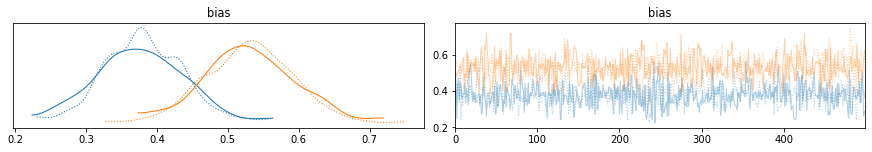

In [10]:
az.plot_trace(biased_model.traces[pid]);

In [15]:
biased_model.divergences()

'No divergences'

### Run Heuristic model

In [11]:
heu_model = Heuristic.Heuristic(model_name='Heuristic', save_path=netcdf_path, summary=df_summary, longform=longform)
heu_model.fit(jupyter=True)
heu_model.calc_Q_table()
heu_model.calc_bics()

Running participant 43 of 43


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/pymc3/distributions/distribution.py:534: UserWarning: You are passing a bound method as logp for DensityDist, this can lead to errors when sampling on platforms other than Linux. Consider using a plain function instead, or subclass Distribution.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [eps]


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 13 seconds.


In [12]:
heu_model.bics[pid]

array([[61.23187056, 59.98056551],
       [62.35880472, 60.11846052],
       [64.25428518, 61.14650972],
       ...,
       [60.19551991, 59.99329895],
       [60.02578105, 60.02726497],
       [60.02474778, 62.88479266]])

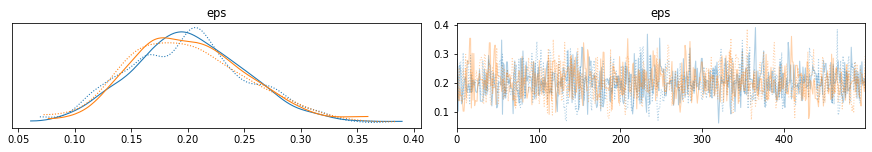

In [13]:
az.plot_trace(heu_model.traces[pid]);

In [14]:
heu_model.divergences()

'No divergences'

### Run Rescorla-Wagner model

In [15]:
rw_model = RescorlaWagner.RW(model_name='RW', save_path=netcdf_path, summary=df_summary, longform=longform)
rw_model.fit(jupyter=True)
rw_model.calc_Q_table()
rw_model.calc_bics()

Running participant 43 of 43


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/pymc3/distributions/distribution.py:534: UserWarning: You are passing a bound method as logp for DensityDist, this can lead to errors when sampling on platforms other than Linux. Consider using a plain function instead, or subclass Distribution.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta, alpha]


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 71 seconds.


In [16]:
rw_model.bics[pid]

array([[75.01168211, 47.71065161],
       [75.01179308, 49.59068791],
       [74.45107403, 51.28689377],
       ...,
       [71.96386163, 58.52757978],
       [72.52928698, 50.38929464],
       [72.5379434 , 47.67245613]])

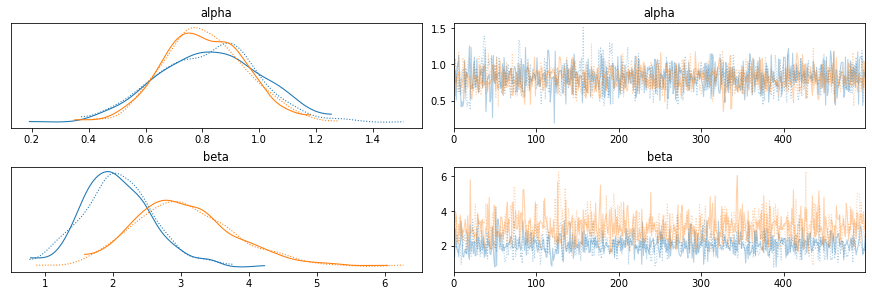

In [17]:
az.plot_trace(rw_model.traces[pid]);

In [18]:
rw_model.divergences()

,PID,Divergences,Level
0,5ca9e89dcb4af3001440da22,305,Major Divergences
1,5c284ae48e845b0001fc40aa,198,Major Divergences
2,5bfadc1846911f0001d7d1eb,322,Major Divergences
3,610008383c0a128712403745,17,Minor
4,5c3848fc19ceb400010c24a0,46,Major Divergences
5,57c9c13079ad9b0001e416be,53,Major Divergences
6,5ec6d423fc10270f0bbbc90e,575,Major Divergences
7,60ff42b20bee1078e198b4e5,615,Major Divergences
8,5b2122862942cc0001e5856b,13,Minor
9,5765c0fcf2e23200017ded5e,296,Major Divergences


### Run RW model with decay

In [ ]:
model = RWDecay.RWDecay(model_name='RWDecay', save_path=netcdf_path, summary=df_summary, longform=longform)
model.fit(jupyter=True)
model.calc_Q_table()

Running participant 1 of 1


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/pymc3/distributions/distribution.py:534: UserWarning:

You are passing a bound method as logp for DensityDist, this can lead to errors when sampling on platforms other than Linux. Consider using a plain function instead, or subclass Distribution.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta, decay, alpha]


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 118 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


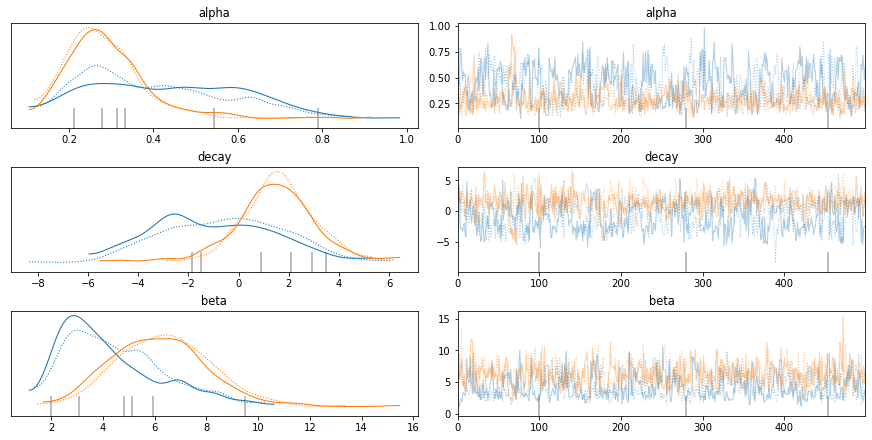

In [ ]:
pid_num = 0
pid = list(model.traces.keys())[pid_num]
az.plot_trace(model.traces[pid]);

In [ ]:
model.divergences()

'No divergences'

### Run RW model with separate learning rates for +/- PEs

In [ ]:
model = RWRL.RWRL(model_name='RWRL', save_path=netcdf_path, summary=df_summary, longform=longform)
model.fit(jupyter=True)
model.calc_Q_table()

Running participant 1 of 1


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/pymc3/distributions/distribution.py:534: UserWarning:

You are passing a bound method as logp for DensityDist, this can lead to errors when sampling on platforms other than Linux. Consider using a plain function instead, or subclass Distribution.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta, alpha_neg, alpha_pos]


/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kulkarnik/miniconda3/envs/jupyter/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 107 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


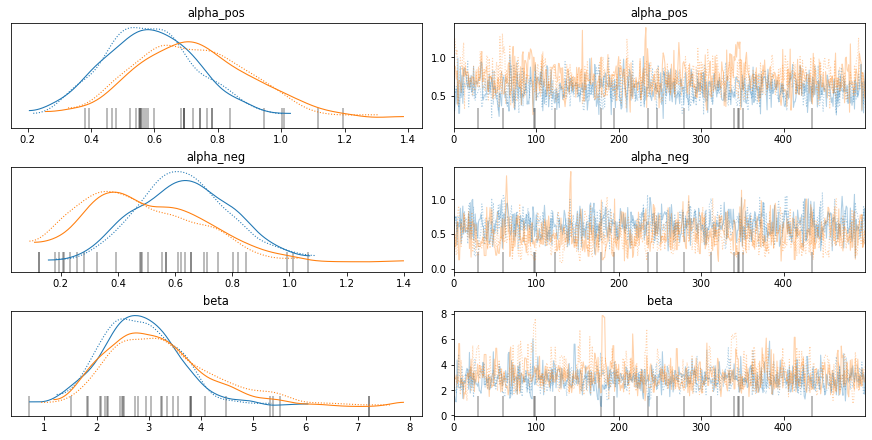

In [ ]:
az.plot_trace(model.traces['KK-1']);

In [ ]:
model.divergences()

,PID,Divergences,Level
0,KK-1,16,Minor


## Subject-level visualization

### Values visualized

PID: 6102d5e6ff92a8dd0cce6b8f


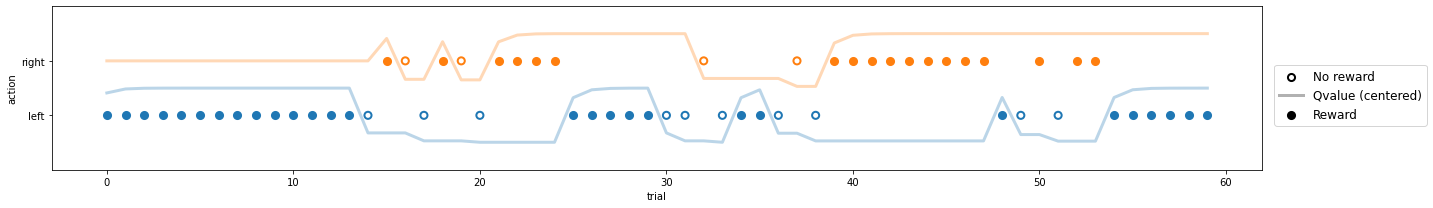

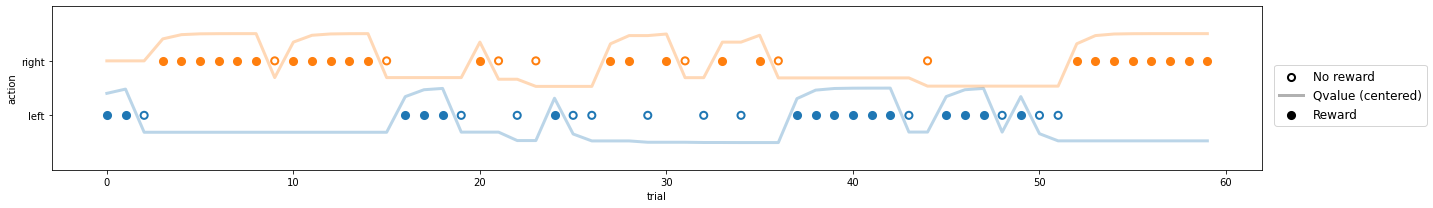

In [19]:
# pid = '60fdab454b8c00448c10fa27'
p_num = 43
pid = df_summary['PID'].values[p_num-1]
print(f'PID: {pid}')

plotting.DecisionModelPlotting.plot_data(model=rw_model, block_type='money', pid=pid)
plotting.DecisionModelPlotting.plot_data(model=rw_model, block_type='other', pid=pid)

### Contrast between money and other

In [ ]:
chain_0_alphas = model.traces[pid].posterior.alpha[0]
chain_1_alphas = model.traces[pid].posterior.alpha[1]
chain_0_contrast = chain_0_alphas[:,0] - chain_0_alphas[:,1]
chain_1_contrast = chain_1_alphas[:,0] - chain_1_alphas[:,1]

chain_0_betas = model.traces[pid].posterior.beta[0]
chain_1_betas = model.traces[pid].posterior.beta[1]
chain_0_b_contrast = chain_0_betas[:,0] - chain_0_betas[:,1]
chain_1_b_contrast = chain_1_betas[:,0] - chain_1_betas[:,1]


array([[<AxesSubplot:title={'center':'alpha_contrasts'}>,
        <AxesSubplot:title={'center':'alpha_contrasts'}>],
       [<AxesSubplot:title={'center':'beta_contrasts'}>,
        <AxesSubplot:title={'center':'beta_contrasts'}>]], dtype=object)

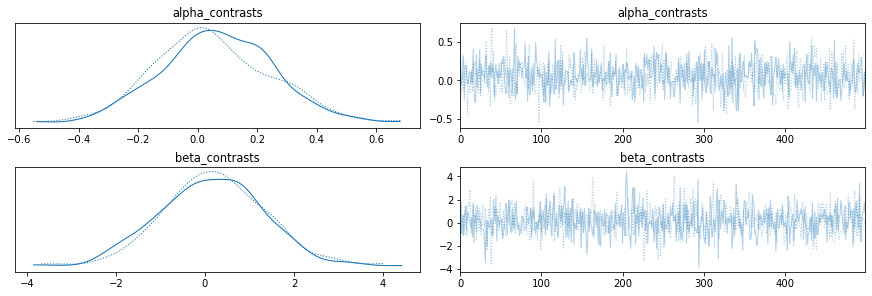

In [ ]:
az.plot_trace(
    az.convert_to_inference_data(dict(
        alpha_contrasts=[chain_0_contrast,chain_1_contrast],
        beta_contrasts=[chain_0_b_contrast,chain_1_b_contrast]
    ))
)

In [107]:
netcdf_path = f'{root_dir}/derivatives/decision/output/'
model_name = 'RW'
model = RescorlaWagner.RW(model_name=model_name, save_path=netcdf_path, summary=df_summary, longform=longform)
model.fit(jupyter=True)
model.calc_Q_table()

Participant 29 completed...


In [80]:
model.traces

{'5e64876fa46cc2204f34e98a': Inference data with groups:
 	> posterior
 	> log_likelihood
 	> sample_stats}

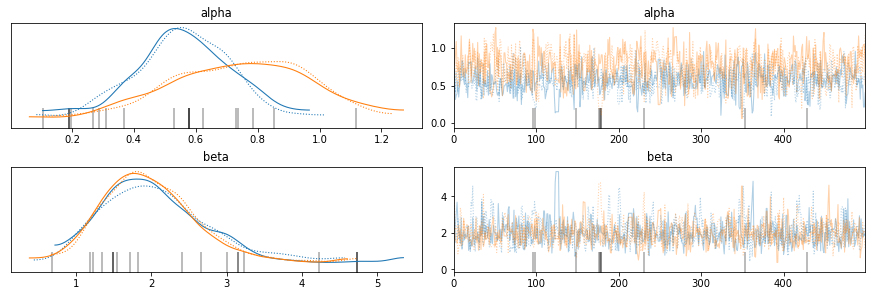

In [108]:
az.plot_trace(model.traces['5e64876fa46cc2204f34e98a']);

In [109]:
div = model.divergences()
div

,PID,Divergences,Level
0,5ca9e89dcb4af3001440da22,305,Major Divergences
1,5c284ae48e845b0001fc40aa,198,Major Divergences
2,5bfadc1846911f0001d7d1eb,322,Major Divergences
3,610008383c0a128712403745,17,Minor
4,5c3848fc19ceb400010c24a0,46,Major Divergences
5,57c9c13079ad9b0001e416be,53,Major Divergences
6,5ec6d423fc10270f0bbbc90e,575,Major Divergences
7,60ff42b20bee1078e198b4e5,615,Major Divergences
8,5b2122862942cc0001e5856b,13,Minor
9,5765c0fcf2e23200017ded5e,296,Major Divergences


PID: 61281debe85082cc937dd9ae


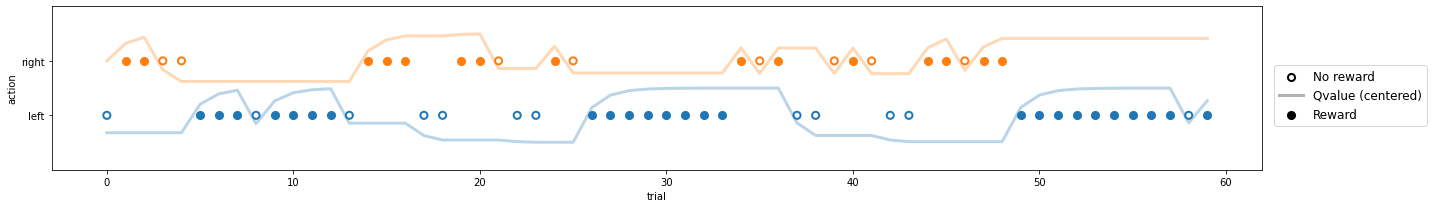

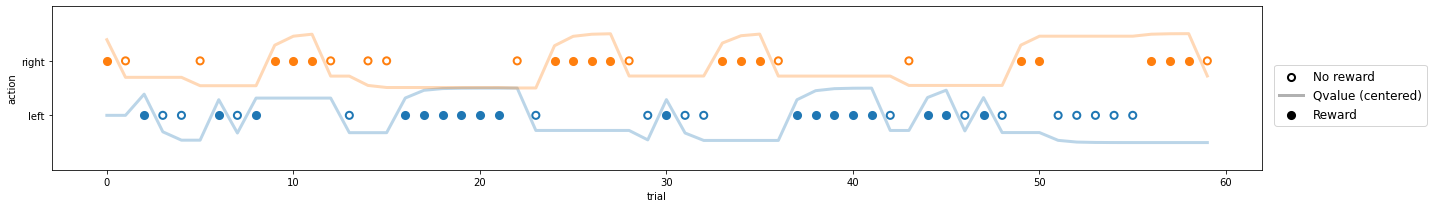

In [110]:
# pid = '5ad78b91b24ddb0001744bc4'
p_num = 0
pid = df_summary['PID'].unique()[p_num]
print(f'PID: {pid}')

plotting.DecisionModelPlotting.plot_data(model=model, block_type='money', pid=pid)
plotting.DecisionModelPlotting.plot_data(model=model, block_type='other', pid=pid)
# plotting.DecisionModelPlotting.plot_data(model=model, block_type='numberbar_mixed', pid=pid)

## Model comparison

In [20]:
mean_bics = {}
for name, model in zip(['biased', 'heuristic', 'rw'], [biased_model, heu_model, rw_model]):
    mean_bics[name] = []
    for pid in biased_model.bics.keys():
        mean_bics[name].append(model.bics[pid].mean(axis=0))
    mean_bics[name] = np.array(mean_bics[name])
    

In [21]:
np.array([mean_bics['biased'][:,i] for i in np.arange(2)]).flatten().shape

(86,)

In [22]:
fig = go.Figure()

names = np.array(['money'] * len(mean_bics['biased'][:,0]) + ['other'] * len(mean_bics['biased'][:,0]))
biased_bics = np.array([mean_bics['biased'][:,i] for i in np.arange(2)]).flatten()
heuristic_bics = np.array([mean_bics['heuristic'][:,i] for i in np.arange(2)]).flatten()
rw_bics = np.array([mean_bics['rw'][:,i] for i in np.arange(2)]).flatten()

fig.add_trace(go.Box(
    x = names,
    y = biased_bics,
    boxpoints='all',
    pointpos=0,
    showlegend=False,
))
fig.add_trace(go.Box(
    x = names,
    y = heuristic_bics,
    boxpoints='all',
    pointpos=0,
    showlegend=False,
))
fig.add_trace(go.Box(
    x = names,
    y = rw_bics,
    boxpoints='all',
    pointpos=0,
    showlegend=False,
))

fig.update_layout(
    width=800,
    height=400,
    boxmode='group'
)

fig.show()

In [23]:
mean_bics['biased'].sum(axis=0)

array([4289.94088695, 4184.83639469])

In [24]:
fig = go.Figure()
names = ['money', 'other']

for model_name in ['biased', 'heuristic', 'rw']:
    fig.add_trace(go.Bar(
        x = names,
        y = mean_bics[model_name].sum(axis=0),
        # boxpoints='all',
        # pointpos=0,
        name=model_name,
    ))

fig.update_layout(
    width=800,
    height=400,
    boxmode='group'
)

fig.show()

In [66]:
fig = go.Figure()

# fig.add_trace(go.Bar(
#     x = mean_bics.keys(),
#     y = [mean_bics[name][:,0].sum()],
#     # boxpoints='all',
#     # pointpos=0,
#     showlegend=False,
# )
    # fig.add_trace(go.Box(
    #     x = [name]*len(mean_bics[name][:,1]),
    #     y = mean_bics[name][:,1],
    #     boxpoints='all',
    #     pointpos=0,
    #     showlegend=False,
    # ))

# fig.update_layout(
#     width=800,
#     height=400,
# )

# fig.show()